In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from biomart import BiomartServer
import io

In [39]:
#os.getcwd()

# Linux workstation
#data_path = '/home/db600/phd/data/'

# Laptop
data_path = 'C:\\Users\\dan\\Documents\\phd\\data\\'

os.listdir(data_path)

['biomart',
 'depmap',
 'missing_gene_names.csv',
 'pathway_commons',
 'reactome',
 'reactome_rows_to_drop.csv',
 'string']

In [40]:
os.listdir(data_path + '/pathway_commons/')

['PathwayCommons12.reactome.hgnc.gmt',
 'PathwayCommons12.reactome.hgnc.gmt.gz',
 'PathwayCommons12.reactome.hgnc.sif',
 'PathwayCommons12.reactome.hgnc.sif.gz',
 'PathwayCommons12.reactome.hgnc.txt',
 'PathwayCommons12.reactome.hgnc.txt.gz',
 'PathwayCommons12.reactome.uniprot.gmt',
 'PathwayCommons12.reactome.uniprot.gmt.gz']

In [41]:
reactome_sif = pd.read_csv(data_path + "pathway_commons/PathwayCommons12.reactome.hgnc.sif", sep="\t")
reactome_sif.head()
reactome_sif.columns = ['PARTICIPANT_A', 'INTERACTION_TYPE', 'PARTICIPANT_B']
reactome_sif.columns

Index(['PARTICIPANT_A', 'INTERACTION_TYPE', 'PARTICIPANT_B'], dtype='object')

In [42]:
print(reactome_sif['INTERACTION_TYPE'].unique())

['in-complex-with' 'controls-state-change-of' 'controls-production-of'
 'controls-transport-of' 'controls-transport-of-chemical'
 'catalysis-precedes' 'controls-phosphorylation-of'
 'controls-expression-of' 'chemical-affects' 'used-to-produce'
 'consumption-controlled-by' 'reacts-with']


In [43]:
reactome_sif.head()

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B
0,A1CF,in-complex-with,APOBEC2
1,A1CF,in-complex-with,APOBEC3A
2,A1CF,in-complex-with,APOBEC3B
3,A1CF,in-complex-with,APOBEC3C
4,A1CF,in-complex-with,APOBEC3H


In [44]:
# Get row count for number of edges in the dataset
len(reactome_sif)

353635

353635
353635
707270


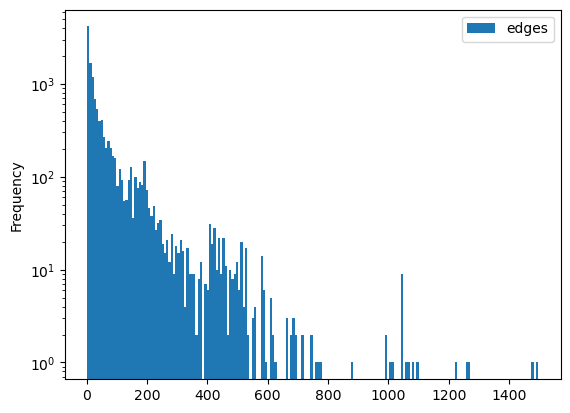

In [45]:
# Get number of nodes and edges and plot histogram of edges showing number of nodes with X edges 
total_gene_a = reactome_sif['PARTICIPANT_A'].tolist()
total_gene_b = reactome_sif['PARTICIPANT_B'].tolist()
total_genes = total_gene_a + total_gene_b

total_genes_df = pd.DataFrame(total_genes, columns=['gene'])

total_genes_df['edges'] = total_genes_df['gene'].map(total_genes_df['gene'].value_counts())

print(len(total_gene_a))
print(len(total_gene_b))
print(len(total_genes))

total_genes_df.head()

unique_genes_df = total_genes_df.drop_duplicates('gene') 
unique_genes_df.sort_values(by='edges', ascending=False)

fig = unique_genes_df.plot(kind='hist', bins=200)

plt.yscale('log')
plt.show()

In [46]:
# See how many nodes there are
unique_gene_a = reactome_sif['PARTICIPANT_A'].unique().tolist()
unique_gene_b = reactome_sif['PARTICIPANT_B'].unique().tolist()
unique_gene_all = set(unique_gene_a + unique_gene_b)

print(len(unique_gene_a))
print(len(unique_gene_b))
print(len(unique_gene_all))

#df = pd.DataFrame.from_dict(count, orient='index')
#df.plot(kind='bar')

10055
10907
12323


In [47]:
reactome_no_duplicates = reactome_sif.drop_duplicates(subset=['PARTICIPANT_A','PARTICIPANT_B'])
len(reactome_no_duplicates)

#reactome_no_duplicates[(reactome_no_duplicates['PARTICIPANT_A']== 'A1CF') & (reactome_no_duplicates['PARTICIPANT_B']=='APOBEC3A')]

329941

In [48]:
reactome_no_duplicates.head()

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B
0,A1CF,in-complex-with,APOBEC2
1,A1CF,in-complex-with,APOBEC3A
2,A1CF,in-complex-with,APOBEC3B
3,A1CF,in-complex-with,APOBEC3C
4,A1CF,in-complex-with,APOBEC3H


In [59]:
#Connect to a Biomart Server
server = BiomartServer("http://useast.ensembl.org/biomart")

# set verbose to True to get some messages
server.verbose = True

# use the 'hsapiens_gene_ensembl' dataset
hsapiens_gene_ensembl = server.datasets['hsapiens_gene_ensembl']

# show all available filters and attributes of the 'hsapiens_gene_ensembl' dataset
#hsapiens_gene_ensembl.show_filters()  # uses pprint
hsapiens_gene_ensembl.show_attributes()  # uses print

# run a search with custom filters and attributes (no header)
response = hsapiens_gene_ensembl.search({
  #'filters': {
  #    'ensembl_gene_id': unique_gene_all,
  #},
  'attributes': [
      'ensembl_gene_id', 'hgnc_symbol', 'external_gene_name', 'chromosome_name', 'ensembl_transcript_id', 'ensembl_peptide_id', 'uniprotsptrembl', 'uniprotswissprot'
  ]
}, header = 1)

# i = -1
# #response format is TSV
# for line in response.iter_lines():
#   i+=1
#   line = line.decode('utf-8')
#   #print(line.split("\t"))
#   conv_frame.loc[i] = line.split("\t")

if response.ok:
    # Convert the response content to a file-like object
    content = io.StringIO(response.content.decode('utf-8'))

    # Read the content into a DataFrame
    biomart = pd.read_csv(content, sep='\t')
else:
    print("Error with the response")

[BiomartServer:'http://useast.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://useast.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 110'] Fetching datasets
[BiomartDatabase:'Mouse strains 110'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 110'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 110'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 110'] Fetching datasets
[BiomartDataset:'hsapiens_gene_ensembl'] Fetching attributes
{'3_utr_end': '3' UTR end' (default: False),
 '3_utr_start': '3' UTR start' (default: False),
 '3utr': '3' UTR' (default: False),
 '5_utr_end': '5' UTR end' (default: False),
 '5_utr_start': '5' UTR start' (default: False),
 '5utr': '5' UTR' (default: False),
 'abrachyrhynchus_homolog_associated_gene_name': 'Pink-footed goose gene name' (default: False),
 'abrachyrhynchus_homolog_canon

In [60]:
biomart.head()

,Gene stable ID,HGNC symbol,Gene name,Chromosome/scaffold name,Transcript stable ID,Protein stable ID,UniProtKB/TrEMBL ID,UniProtKB/Swiss-Prot ID
0,ENSG00000198888,MT-ND1,MT-ND1,MT,ENST00000361390,ENSP00000354687,U5Z754,P03886
1,ENSG00000198763,MT-ND2,MT-ND2,MT,ENST00000361453,ENSP00000355046,Q7GXY9,P03891
2,ENSG00000198804,MT-CO1,MT-CO1,MT,ENST00000361624,ENSP00000354499,U5YWV7,P00395
3,ENSG00000198712,MT-CO2,MT-CO2,MT,ENST00000361739,ENSP00000354876,U5Z487,P00403
4,ENSG00000228253,MT-ATP8,MT-ATP8,MT,ENST00000361851,ENSP00000355265,U5YV54,P03928


In [61]:
len(biomart)

123120

In [62]:
scaffolds = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y']
biomart_primary = biomart[biomart['Chromosome/scaffold name'].isin(scaffolds)]

len(biomart_primary)

111338

In [65]:
biomart_duplicates = biomart_primary[biomart_primary.duplicated(subset=['HGNC symbol'], keep=False)]
biomart_duplicates[biomart_duplicates['Gene name'].isnull()]

,Gene stable ID,HGNC symbol,Gene name,Chromosome/scaffold name,Transcript stable ID,Protein stable ID,UniProtKB/TrEMBL ID,UniProtKB/Swiss-Prot ID
1129,ENSG00000273167,NaN,NaN,13,ENST00000382141,ENSP00000371576,A0A0A0MRY4,NaN
1687,ENSG00000288593,NaN,NaN,21,ENST00000674444,ENSP00000501503,NaN,NaN
1836,ENSG00000249209,NaN,NaN,21,ENST00000429238,ENSP00000394107,H7C0C1,NaN
1899,ENSG00000260861,NaN,NaN,20,ENST00000566961,ENSP00000457551,H3BUA5,NaN
1900,ENSG00000260861,NaN,NaN,20,ENST00000567028,ENSP00000454437,H3BML4,NaN
...,...,...,...,...,...,...,...,...
122296,ENSG00000285629,NaN,NaN,1,ENST00000484532,ENSP00000465763,K7EKS7,NaN
122665,ENSG00000288678,NaN,NaN,1,ENST00000679970,ENSP00000505765,A0A7P0T9M0,NaN
122666,ENSG00000288678,NaN,NaN,1,ENST00000710329,ENSP00000518209,NaN,NaN
122941,ENSG00000286015,NaN,NaN,1,ENST00000651827,ENSP00000498451,A0A494C0A1,NaN


In [69]:
# Assuming that the real dataframes have the correct mappings between HGNC symbols and PARTICIPANT_A/B
# The following code should work for your requirement:

# Code to map Gene stable IDs to PARTICIPANT_A and PARTICIPANT_B

# First, create a mapping dictionary from the second dataframe
# Here we map 'HGNC symbol' to 'Gene stable ID'

# Drop duplicate biomart rows and anything without an HGNC

biomart_no_null = biomart_primary.dropna(subset=['HGNC symbol'])
print(len(biomart_no_null))

biomart_no_null = biomart_no_null.drop_duplicates(subset=['HGNC symbol', 'Gene stable ID'], keep='first')
print(len(biomart_no_null))

#biomart_no_null.head()
#biomart_no_null[biomart_no_null['Gene name'].isnull()]

# These duplicates are expected because there are multiple transcripts per gene
#biomart_duplicates = biomart[biomart.duplicated(subset=['HGNC symbol'], keep=False)]
hgnc_to_gene_id = biomart_no_null.set_index('HGNC symbol')['Gene stable ID'].to_dict()

# Now, use this dictionary to map the PARTICIPANT_A and PARTICIPANT_B values
# in the first dataframe to their corresponding Gene stable ID
reactome_no_duplicates.loc['PARTICIPANT_A_ENSG'] = reactome_no_duplicates['PARTICIPANT_A'].map(hgnc_to_gene_id)
reactome_no_duplicates.loc['PARTICIPANT_B_ENSG'] = reactome_no_duplicates['PARTICIPANT_B'].map(hgnc_to_gene_id)

# The result is a modified version of df1 with two new columns: PARTICIPANT_A_ENSG and PARTICIPANT_B_ENSG
# These columns contain the Gene stable ID corresponding to the HGNC symbols in PARTICIPANT_A and PARTICIPANT_B

# Show the modified dataframe (for demonstration, it will show NaNs because of the sample data)
reactome_no_duplicates.head()  # Display the first few rows of the modified dataframe



110320
19825


C:\Users\dan\AppData\Local\Temp\ipykernel_14824\1955572428.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactome_no_duplicates.loc['PARTICIPANT_A_ENSG'] = reactome_no_duplicates['PARTICIPANT_A'].map(hgnc_to_gene_id)
C:\Users\dan\AppData\Local\Temp\ipykernel_14824\1955572428.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactome_no_duplicates.loc['PARTICIPANT_B_ENSG'] = reactome_no_duplicates['PARTICIPANT_B'].map(hgnc_to_gene_id)


,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,PARTICIPANT_A_ENSG,PARTICIPANT_B_ENSG
0,A1CF,in-complex-with,APOBEC2,ENSG00000148584,ENSG00000124701
1,A1CF,in-complex-with,APOBEC3A,ENSG00000148584,ENSG00000128383
2,A1CF,in-complex-with,APOBEC3B,ENSG00000148584,ENSG00000179750
3,A1CF,in-complex-with,APOBEC3C,ENSG00000148584,ENSG00000244509
4,A1CF,in-complex-with,APOBEC3H,ENSG00000148584,ENSG00000100298


In [71]:
unique_nodes = set(reactome_no_duplicates['PARTICIPANT_A_ENSG'].tolist() +  reactome_no_duplicates['PARTICIPANT_B_ENSG'].tolist())
print(len(unique_nodes))
print(len(reactome_no_duplicates))

10141
329943


In [ ]:
# Use biomart conv to add an ENSG column for gene A and gene B 
#biomart = pd.read_csv(data_path + "biomart/ensg_enst_ensp_hgnc_name.txt")
biomart.head()
print(len(biomart))
gname_reactome_matches = biomart[biomart['Gene name'].isin(unique_gene_all)]
hgnc_reactome_matches = biomart[biomart['HGNC symbol'].isin(unique_gene_all)]

gname_reactome_misses = biomart[~biomart['Gene name'].isin(unique_gene_all)]
hgnc_reactome_misses = biomart[~biomart['HGNC symbol'].isin(unique_gene_all)]

print(len(hgnc_reactome_matches))
print(len(gname_reactome_matches))
print(len(gname_reactome_matches.drop_duplicates('Gene name')))
print(len(hgnc_reactome_matches.drop_duplicates('Gene name')))

gname_reactome_misses = gname_reactome_misses['Gene name'].tolist()
hgnc_reactome_misses = hgnc_reactome_misses['HGNC symbol'].tolist()

total_misses = set(gname_reactome_misses + hgnc_reactome_misses)
print(total_misses)
total_misses_df = pd.DataFrame(total_misses)
total_misses_df.to_csv(data_path + 'missing_gene_names.csv')
#len(biomart[biomart['Gene name'].isnull()])
#len(biomart)
biomart.head()

biomart[biomart['HGNC symbol'].isnull()]

biomart_no_null = biomart.dropna(subset=['HGNC symbol', 'Gene name'], how='all')

print(len(biomart_no_null))
biomart_no_null.head()
biomart_no_null[biomart_no_null['Gene name'].isnull()]

# These duplicates are expected because there are multiple transcripts per gene
#biomart_duplicates = biomart[biomart.duplicated(subset=['HGNC symbol'], keep=False)]
#biomart_duplicates
#biomart['Chromosome/scaffold name'].unique()

In [33]:
unique_gene_all

{'PNLIPRP3',
 'NQO1',
 'ZNRF1',
 'CHEBI:16581',
 'TSEN2',
 'ST6GAL1',
 'SMC1A',
 'CHEBI:17140',
 'ACE2',
 'CCNC',
 'ZNF441',
 'GUCY2F',
 'UBE2W',
 'OR10A7',
 'RIMKLA',
 'CHEBI:7207',
 'EEF1AKMT1',
 'CAPZA2',
 'EIF3M',
 'METTL3',
 'RPL10A',
 'BDH1',
 'KIF2A',
 'HTN1',
 'GPR27',
 'APOB',
 'LTA',
 'OR6T1',
 'ANAPC16',
 'THEM5',
 'ARHGDIG',
 'KLK3',
 'PTPN22',
 'AGTR2',
 'PEX14',
 'COL1A1',
 'OTOF',
 'MCCC1',
 'TNKS',
 'CHEBI:68575',
 'OR6C68',
 'CHEBI:29866',
 'HRH4',
 'ZNF699',
 'ESRRG',
 'SMAD9',
 'TPGS1',
 'SERPINE1',
 'NDUFA11',
 'BARD1',
 'HACL1',
 'ZNF658',
 'PIGK',
 'TAS2R1',
 'PTCH1',
 'WDR12',
 'PDIA3',
 'OXCT2',
 'CMC4',
 'SEMA3E',
 'CHEBI:32325',
 'CHEBI:49603',
 'VNN3',
 'FSHR',
 'PTPN6',
 'LEFTY1',
 'WDR61',
 'HTR1B',
 'CENPM',
 'OR10J5',
 'TGFBR2',
 'DIO1',
 'CHEBI:37643',
 'THRSP',
 'DUSP16',
 'CHEBI:138673',
 'ORC5',
 'DNAJC5',
 'LRFN4',
 'FAAP100',
 'TAF4B',
 'AGO2',
 'IL1F10',
 'OR4F17',
 'OR13D1',
 'SCGB3A2',
 'HIST1H3D',
 'WNT2',
 'GRHL1',
 'IFNL3',
 'NTF3',
 'CHEBI:65

In [34]:
reactome_ensga = pd.merge(reactome_no_duplicates, biomart_no_null[['Gene name','Gene stable ID']], left_on='PARTICIPANT_B', right_on='Gene name', how="left")
reactome_ensga.head(20)

reactome_ensga = reactome_ensga.drop_duplicates()

print(len(reactome_ensga))
reactome_ensga.head()

377688


,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,Gene name,Gene stable ID
0,A1CF,in-complex-with,APOBEC2,APOBEC2,ENSG00000124701
1,A1CF,in-complex-with,APOBEC3A,APOBEC3A,ENSG00000262156
3,A1CF,in-complex-with,APOBEC3A,APOBEC3A,ENSG00000128383
5,A1CF,in-complex-with,APOBEC3B,APOBEC3B,ENSG00000179750
9,A1CF,in-complex-with,APOBEC3C,APOBEC3C,ENSG00000244509


In [ ]:
# Look at gProfiler for namespace conversion
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
gp_conv = gp.convert(organism='hsapiens',
            query=list(unique_gene_all),
            target_namespace='ENSG')
            #target_namespace='ENTREZGENE_ACC')
            
gp_conv.head()
gp_conv[gp_conv.duplicated(subset=['incoming'],keep=False)]

In [ ]:
gp_conv.head()

In [ ]:
help(GProfiler)

In [ ]:
result = pd.merge(reactome_no_duplicates, gp_conv[['incoming','converted']], left_on='PARTICIPANT_A', right_on='incoming', how="left")

result.head()

In [ ]:
len(result)

In [ ]:
result = result.drop_duplicates()
len(result)

In [ ]:
# Replacing 'None' with NaN in column X
result[['converted']] = result[['converted']].replace('None', np.nan)

result[result['converted'].isnull()]

In [ ]:
result_duplicates = result.duplicated(subset=['PARTICIPANT_A','PARTICIPANT_B'])
result[~result_duplicates]

In [ ]:
result2 = pd.merge(result, biomart_no_null[['Gene name','Gene stable ID']], left_on='PARTICIPANT_A', right_on='Gene name', how="left")
result2.head()

result2[(result2['converted'].notna()) & (result2['Gene stable ID'].isnull())]

In [ ]:
len(result2)

In [ ]:
result2['PARTICIPANT_A_ENSG'] = np.where(result2['Gene stable ID'].notna(), result2['Gene stable ID'], result2['converted'])
result2

In [ ]:
len(result2)

In [ ]:
# Drop conversion columns to use again
result2 = result2.drop(['incoming', 'converted', 'Gene name', 'Gene stable ID'], axis=1)

In [ ]:
result3 = pd.merge(result2, gp_conv[['incoming','converted']], left_on='PARTICIPANT_B', right_on='incoming', how="left")

In [ ]:
result3.head()

In [ ]:
# Replacing 'None' with NaN in column X
result3[['converted']] = result3[['converted']].replace('None', np.nan)

In [ ]:
result3[result3['converted'].isnull()]

In [ ]:
result4 = pd.merge(result3, biomart_no_null[['Gene name','Gene stable ID']], left_on='PARTICIPANT_B', right_on='Gene name', how="left")
result4.head()

In [ ]:
result4['PARTICIPANT_B_ENSG'] = np.where(result4['Gene stable ID'].notna(), result4['Gene stable ID'], result4['converted'])
result4

In [ ]:
result4 = result4.drop(['incoming', 'converted', 'Gene name', 'Gene stable ID'], axis=1)
result4

In [ ]:
result4[result4['PARTICIPANT_A_ENSG'].notna() & result4['PARTICIPANT_B_ENSG'].notna()]

In [ ]:
result4 = result4.drop_duplicates()

len(result4)

In [ ]:
result4

In [ ]:
full_results = result4[result4['PARTICIPANT_A_ENSG'].notna() & result4['PARTICIPANT_B_ENSG'].notna()]
print(len(full_results))
full_results